In [1]:
import luigi
import pandas as pd
from dotenv import load_dotenv
from nyaggle.experiment import run_experiment
from thunderbolt import Thunderbolt
from sklearn.metrics import roc_auc_score
import os
import numpy as np

/home/yuto/cat-in-the-dat-ii/.venv/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/yuto/cat-in-the-dat-ii/.venv/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [2]:
pd.options.display.max_columns = 100

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
load_dotenv()

True

In [5]:
os.environ["RANDOM_STATE"]

'110'

In [6]:
data = pd.read_pickle(
    "./resources/train/preprocessed_data_fd65bc938792c1f78946c2be65d66989.pkl"
)

2020-02-29 08:47:05,105 WARNING ac362c64-bb53-4186-90db-a1a8108e82a8 : failed to load file: metrics.json
2020-02-29 08:47:05,106 WARNING ac362c64-bb53-4186-90db-a1a8108e82a8 : failed to load file: params.json
2020-02-29 08:47:05,274 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Algorithm: lgbm
2020-02-29 08:47:05,276 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Experiment: output/20200229_084705
2020-02-29 08:47:05,276 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Params: {'seed': '110', 'learning_rate': 0.01, 'n_estimators': 100000, 'verbose_evals': 100, 'lambda_l1': 0.008326236276901882, 'lambda_l2': 6.599312336484268, 'num_leaves': 3, 'feature_fraction': 0.5, 'bagging_fraction': 0.9094149008241834, 'bagging_freq': 5, 'min_child_samples': 50}
2020-02-29 08:47:05,278 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Features: ['BinaryCategorical_bin_0', 'BinaryCategorical_bin_1', 'BinaryCategorical_bin_2', 'BinaryCategorical_bin_3', 'BinaryCategorical_bin_4', 'Ordinary_ord_0', 'Ordinary_ord_1', 

Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.686774	valid_0's binary_logloss: 0.462123
[200]	valid_0's auc: 0.714606	valid_0's binary_logloss: 0.452054
[300]	valid_0's auc: 0.730869	valid_0's binary_logloss: 0.444501
[400]	valid_0's auc: 0.742874	valid_0's binary_logloss: 0.438552
[500]	valid_0's auc: 0.751698	valid_0's binary_logloss: 0.433629
[600]	valid_0's auc: 0.758434	valid_0's binary_logloss: 0.429428
[700]	valid_0's auc: 0.763185	valid_0's binary_logloss: 0.425777
[800]	valid_0's auc: 0.767087	valid_0's binary_logloss: 0.422642
[900]	valid_0's auc: 0.770396	valid_0's binary_logloss: 0.419904
[1000]	valid_0's auc: 0.772715	valid_0's binary_logloss: 0.41751
[1100]	valid_0's auc: 0.774796	valid_0's binary_logloss: 0.415392
[1200]	valid_0's auc: 0.776546	valid_0's binary_logloss: 0.413491
[1300]	valid_0's auc: 0.777966	valid_0's binary_logloss: 0.411829
[1400]	valid_0's auc: 0.779096	valid_0's binary_logloss: 0.410353
[1500]	valid_0's auc: 0.

2020-02-29 08:52:27,643 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Fold 0 score: 0.7885333497360723
2020-02-29 08:52:27,644 DEBUG ac362c64-bb53-4186-90db-a1a8108e82a8 : 322.211 sec / fold
/home/yuto/cat-in-the-dat-ii/.venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.687806	valid_0's binary_logloss: 0.462024
[200]	valid_0's auc: 0.714587	valid_0's binary_logloss: 0.451928
[300]	valid_0's auc: 0.730643	valid_0's binary_logloss: 0.444469
[400]	valid_0's auc: 0.741963	valid_0's binary_logloss: 0.438558
[500]	valid_0's auc: 0.751184	valid_0's binary_logloss: 0.433639
[600]	valid_0's auc: 0.757647	valid_0's binary_logloss: 0.429454
[700]	valid_0's auc: 0.762253	valid_0's binary_logloss: 0.425849
[800]	valid_0's auc: 0.765945	valid_0's binary_logloss: 0.42276
[900]	valid_0's auc: 0.76896	valid_0's binary_logloss: 0.420048
[1000]	valid_0's auc: 0.771726	valid_0's binary_logloss: 0.417648
[1100]	valid_0's auc: 0.773845	valid_0's binary_logloss: 0.415543
[1200]	valid_0's auc: 0.775618	valid_0's binary_logloss: 0.413684
[1300]	valid_0's auc: 0.777101	valid_0's binary_logloss: 0.412011
[1400]	valid_0's auc: 0.778334	valid_0's binary_logloss: 0.410554
[1500]	valid_0's auc: 0.7

2020-02-29 08:58:11,241 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Fold 1 score: 0.7879664399281194
2020-02-29 08:58:11,242 DEBUG ac362c64-bb53-4186-90db-a1a8108e82a8 : 343.591 sec / fold
/home/yuto/cat-in-the-dat-ii/.venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.684273	valid_0's binary_logloss: 0.462348
[200]	valid_0's auc: 0.71325	valid_0's binary_logloss: 0.45227
[300]	valid_0's auc: 0.728849	valid_0's binary_logloss: 0.4449
[400]	valid_0's auc: 0.740483	valid_0's binary_logloss: 0.439031
[500]	valid_0's auc: 0.749171	valid_0's binary_logloss: 0.434101
[600]	valid_0's auc: 0.756047	valid_0's binary_logloss: 0.429872
[700]	valid_0's auc: 0.761072	valid_0's binary_logloss: 0.42621
[800]	valid_0's auc: 0.765214	valid_0's binary_logloss: 0.423056
[900]	valid_0's auc: 0.768468	valid_0's binary_logloss: 0.420303
[1000]	valid_0's auc: 0.771187	valid_0's binary_logloss: 0.417891
[1100]	valid_0's auc: 0.77345	valid_0's binary_logloss: 0.415731
[1200]	valid_0's auc: 0.775176	valid_0's binary_logloss: 0.413852
[1300]	valid_0's auc: 0.776728	valid_0's binary_logloss: 0.412181
[1400]	valid_0's auc: 0.778068	valid_0's binary_logloss: 0.410674
[1500]	valid_0's auc: 0.77914

2020-02-29 09:03:39,143 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Fold 2 score: 0.7885024167564427
2020-02-29 09:03:39,145 DEBUG ac362c64-bb53-4186-90db-a1a8108e82a8 : 327.895 sec / fold
/home/yuto/cat-in-the-dat-ii/.venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.685122	valid_0's binary_logloss: 0.462231
[200]	valid_0's auc: 0.713443	valid_0's binary_logloss: 0.452103
[300]	valid_0's auc: 0.72929	valid_0's binary_logloss: 0.444662
[400]	valid_0's auc: 0.741563	valid_0's binary_logloss: 0.438847
[500]	valid_0's auc: 0.750517	valid_0's binary_logloss: 0.433931
[600]	valid_0's auc: 0.756894	valid_0's binary_logloss: 0.42976
[700]	valid_0's auc: 0.761623	valid_0's binary_logloss: 0.426198
[800]	valid_0's auc: 0.765316	valid_0's binary_logloss: 0.423133
[900]	valid_0's auc: 0.768334	valid_0's binary_logloss: 0.420492
[1000]	valid_0's auc: 0.770847	valid_0's binary_logloss: 0.418155
[1100]	valid_0's auc: 0.772789	valid_0's binary_logloss: 0.416114
[1200]	valid_0's auc: 0.774327	valid_0's binary_logloss: 0.414298
[1300]	valid_0's auc: 0.775627	valid_0's binary_logloss: 0.412684
[1400]	valid_0's auc: 0.77673	valid_0's binary_logloss: 0.411244
[1500]	valid_0's auc: 0.77

2020-02-29 09:08:46,526 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Fold 3 score: 0.7857385359254752
2020-02-29 09:08:46,527 DEBUG ac362c64-bb53-4186-90db-a1a8108e82a8 : 307.374 sec / fold
/home/yuto/cat-in-the-dat-ii/.venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.684407	valid_0's binary_logloss: 0.462226
[200]	valid_0's auc: 0.7137	valid_0's binary_logloss: 0.45192
[300]	valid_0's auc: 0.730845	valid_0's binary_logloss: 0.444355
[400]	valid_0's auc: 0.742325	valid_0's binary_logloss: 0.438429
[500]	valid_0's auc: 0.751605	valid_0's binary_logloss: 0.433434
[600]	valid_0's auc: 0.758499	valid_0's binary_logloss: 0.429157
[700]	valid_0's auc: 0.763517	valid_0's binary_logloss: 0.425496
[800]	valid_0's auc: 0.76762	valid_0's binary_logloss: 0.422314
[900]	valid_0's auc: 0.770618	valid_0's binary_logloss: 0.419576
[1000]	valid_0's auc: 0.773316	valid_0's binary_logloss: 0.417163
[1100]	valid_0's auc: 0.77546	valid_0's binary_logloss: 0.415035
[1200]	valid_0's auc: 0.777196	valid_0's binary_logloss: 0.413161
[1300]	valid_0's auc: 0.778553	valid_0's binary_logloss: 0.411492
[1400]	valid_0's auc: 0.779775	valid_0's binary_logloss: 0.409988
[1500]	valid_0's auc: 0.7807

2020-02-29 09:13:46,072 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Fold 4 score: 0.7892836651822648
2020-02-29 09:13:46,073 DEBUG ac362c64-bb53-4186-90db-a1a8108e82a8 : 299.538 sec / fold
2020-02-29 09:13:46,305 INFO ac362c64-bb53-4186-90db-a1a8108e82a8 : Overall score: 0.7879994853575198


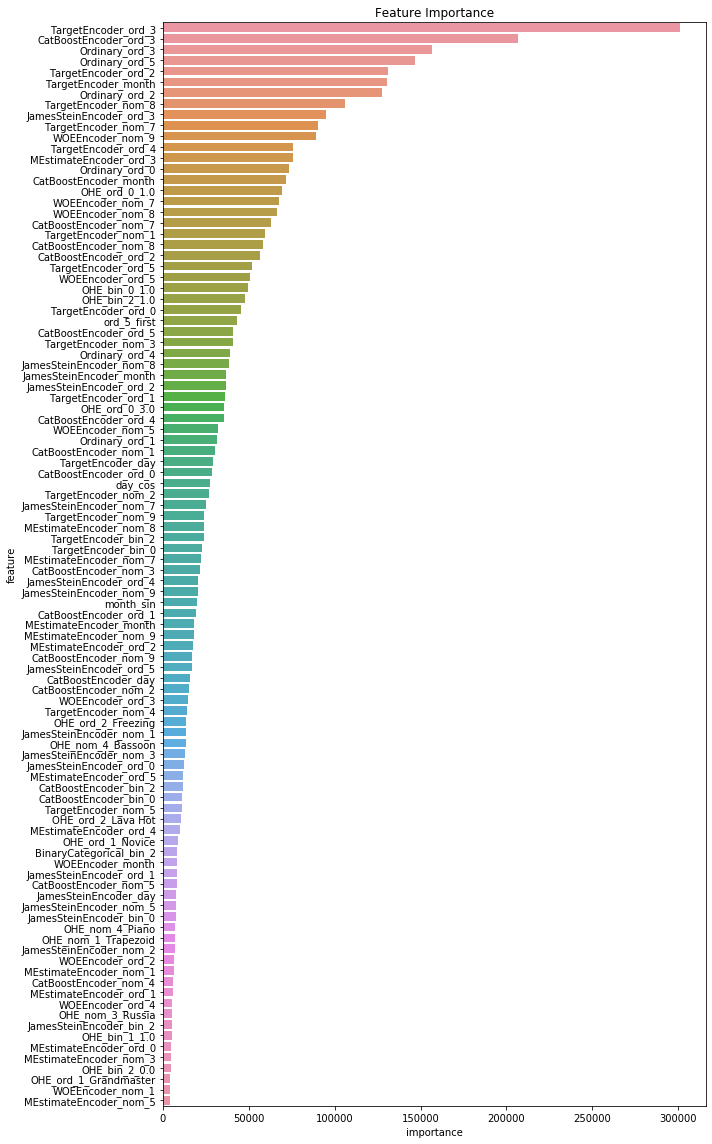

In [7]:
# model_params = {
#     "learning_rate": 0.01,
#     "n_estimators": 100000,
#     "verbose_evals": 100,
#     "eval_metric": "auc",
#     "lambda_l1": 1.054015196703831e-08,
#     "lambda_l2": 6.589538565689351,
#     "num_leaves": 2,
#     "feature_fraction": 0.4,
#     "bagging_fraction": 0.7489582877415011,
#     "bagging_freq": 6,
#     "min_child_samples": 25,
#     "seed": os.environ["RANDOM_STATE"],
# }
model_params = {
    "seed": os.environ["RANDOM_STATE"],
    "learning_rate": 0.01,
    "n_estimators": 100000,
    "verbose_evals": 100,
    "lambda_l1": 0.008326236276901882,
    "lambda_l2": 6.599312336484268,
    "num_leaves": 3,
    "feature_fraction": 0.5,
    "bagging_fraction": 0.9094149008241834,
    "bagging_freq": 5,
    "min_child_samples": 50,
}
fit_params = {"eval_metric": "auc", "early_stopping_rounds": 100, "verbose": 100}

result = run_experiment(
    model_params=model_params,
    X_train=data.train_X,
    y=data.train_y,
    X_test=data.test_X,
    eval_func=roc_auc_score,
    type_of_target="binary",
    cv=data.fold,
    fit_params=fit_params,
    #     with_auto_hpo=True,
    sample_submission=pd.read_csv("../input/cat-in-the-dat-ii/sample_submission.csv"),
    submission_filename="submission.csv",
    with_mlflow=True,
)

In [ ]:
!mlflow ui

In [ ]:
sub = pd.read_csv("../input/cat-in-the-dat-ii/sample_submission.csv")
target = np.load("./output/20200228_032413/test_prediction.npy")
sub["target"] = target
sub.to_csv("./sub.csv", index=False)

In [2]:
tb = Thunderbolt('./resources')

In [10]:
tb.get_task_df().query('task_name == "TargetEncode"').loc[55, 'task_params']

{'target_columns': 'bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month',
 'smoothing': '0.8'}